# Лабораторная работа 5.  Эвристические алгоритмы

**Цель работы:** ознакомление с  эвристическими алгоритмами  и методикой оценки  их эффективности.

**Продолжительность работы:** - 4 часа. 

**Мягкий дедлайн (10 баллов)**: 20.05.2023 

**Жесткий дедлайн (5 баллов)**: 02.06.2023



In [1]:
import pandas as pd
import copy
from collections import deque
from math import inf
from wand.image import Image as WImage

## Варианты заданий



## Задание 1.

Дан либиринт. Вход в лабиринт находится сверху слева, выход - снизу справа.  

| Вариант | Лабиринт | 
|:---|:---|
|  7  | ![](./img/maze05/maze05_07.png) |


а) Используя волновой алгоритм вручную построить оптимальный путь через лабиринт.

б) Используя маршрутный алгоритм вручную построить оптимальный путь через лабиринт.



## Задание 2.

Дан либиринт. Вход в лабиринт находится сверху слева, выход - снизу справа. 
Реализовав алгоритм в соответствии с заданием построить оптимальный путь через лабиринт.

| Вариант | Лабиринт | Алгоритм |
|:---|:---|:---|
|  7  | ![](./img/maze10/maze10_07.png) | Двухлучевой алгоритм |


Евклидово расстояние: $d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 }$ (Двигаться можно по ветрикали, горизонтали и диагонали)

Манхэттенское расстояние:  $d = |x_2 - x_1| + |y_2 - y_1| $ (Двигаться можно только по горизонтали и вертикали)





# 1 Task. Handjob

## Wave ALG

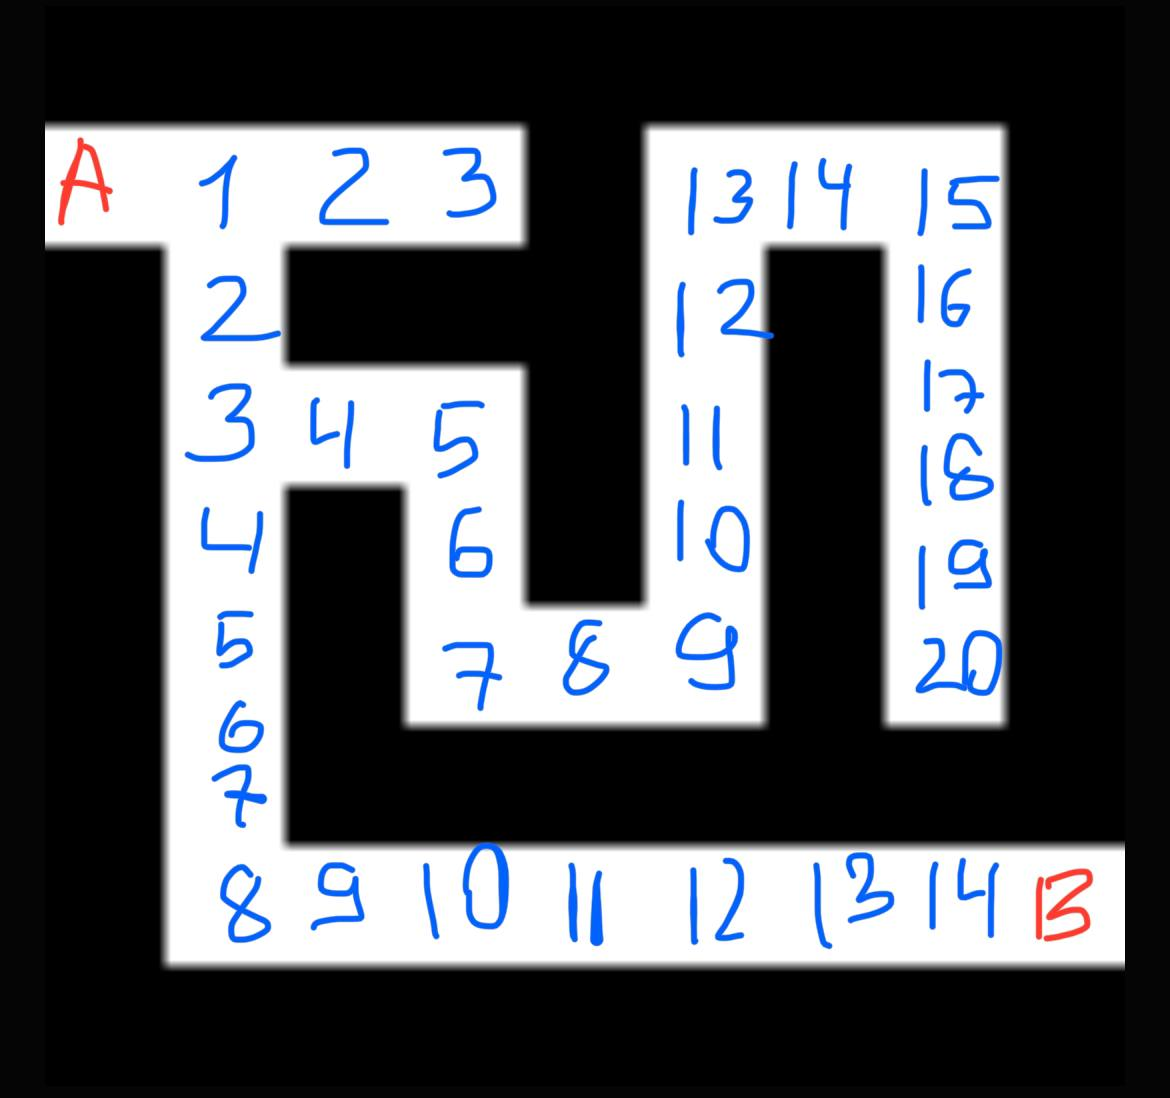

In [2]:
img = WImage(filename='./img/hand_job/wave_handjob.jpg')
img

## Marchroute ALG

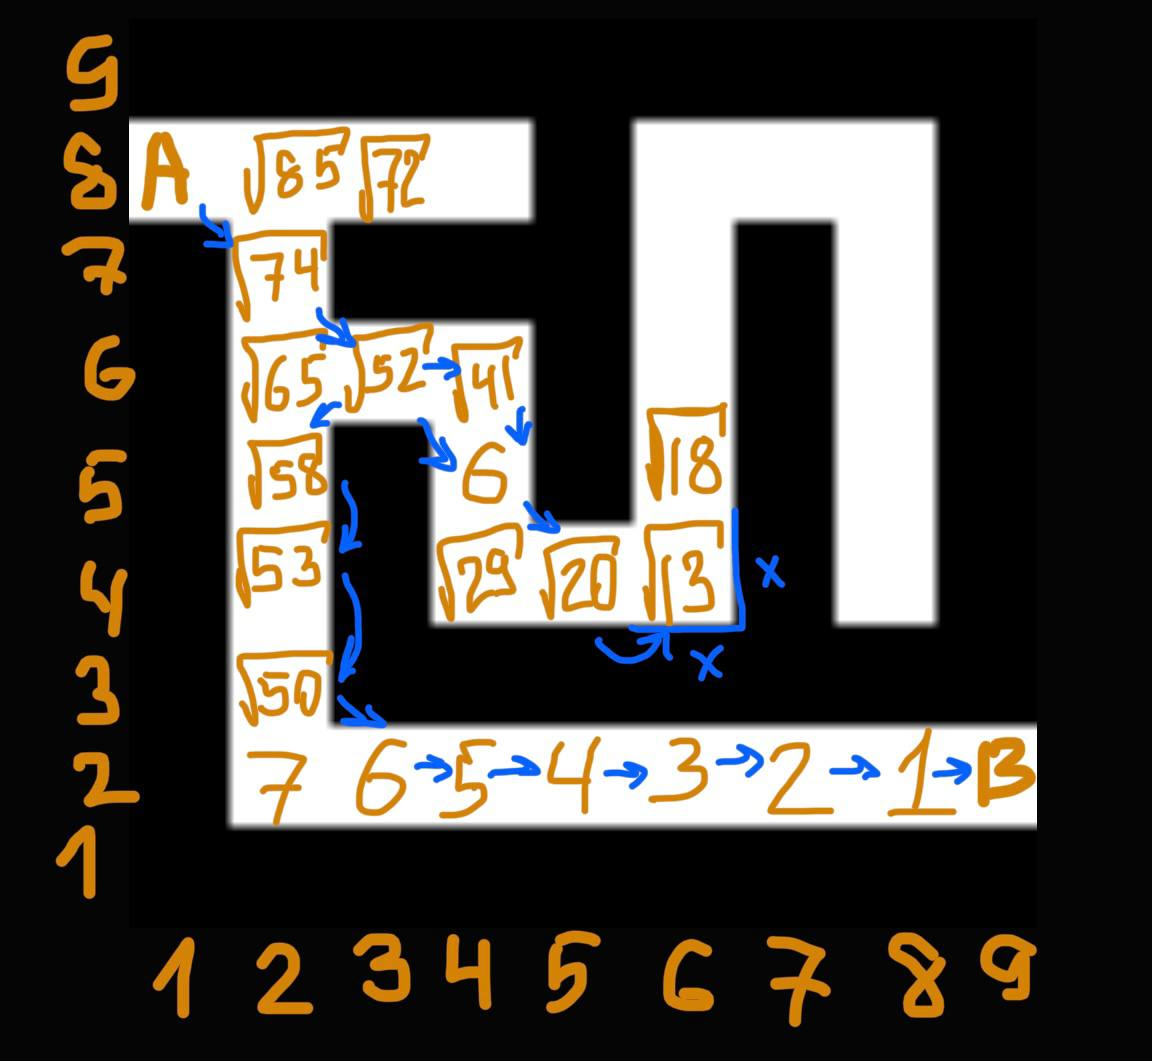

In [3]:
img = WImage(filename='./img/hand_job/marchroute_handjob.jpg')
img

# Task 2

# Given data

In [4]:
# given data
LABIRINTH = [
    ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'],
    ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.', '.', '.', '.', '#'],
    ['#', '.', '#', '#', '#', '#', '#', '#', '#', '#', '#', '.', '#', '.', '#', '#', '#', '.', '#', '.', '#'],
    ['#', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.', '.', '#', '.', '.', '.', '#', '.', '#', '.', '#'],
    ['#', '#', '#', '#', '#', '.', '#', '#', '#', '.', '#', '#', '#', '#', '#', '#', '#', '.', '#', '#', '#'],
    ['#', '.', '.', '.', '#', '.', '.', '.', '#', '.', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '#'],
    ['#', '#', '#', '.', '#', '#', '#', '.', '#', '#', '#', '#', '#', '#', '#', '.', '#', '#', '#', '.', '#'],
    ['#', '.', '.', '.', '.', '.', '#', '.', '#', '.', '.', '.', '#', '.', '.', '.', '#', '.', '.', '.', '#'],
    ['#', '.', '#', '#', '#', '#', '#', '.', '#', '#', '#', '.', '#', '.', '#', '#', '#', '.', '#', '#', '#'],
    ['#', '.', '.', '.', '#', '.', '.', '.', '.', '.', '#', '.', '#', '.', '.', '.', '#', '.', '.', '.', '#'],
    ['#', '.', '#', '.', '#', '.', '#', '#', '#', '#', '#', '.', '#', '#', '#', '.', '#', '#', '#', '.', '#'],
    ['#', '.', '#', '.', '#', '.', '.', '.', '.', '.', '.', '.', '#', '.', '#', '.', '.', '.', '.', '.', '#'],
    ['#', '.', '#', '.', '#', '#', '#', '#', '#', '#', '#', '#', '#', '.', '#', '#', '#', '#', '#', '.', '#'],
    ['#', '.', '#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '#', '.', '#'],
    ['#', '#', '#', '#', '#', '#', '#', '#', '#', '.', '#', '#', '#', '.', '#', '.', '#', '.', '#', '.', '#'],
    ['#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '#', '.', '#', '.', '.', '.', '#'],
    ['#', '.', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '.', '#', '.', '#', '#', '#', '#', '#'],
    ['#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.', '#', '.', '#', '.', '.', '.', '#'],
    ['#', '.', '#', '#', '#', '#', '#', '#', '#', '#', '#', '.', '#', '#', '#', '.', '#', '#', '#', '.', '#'],
    ['#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
    ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'],

]

START = (1, 0)
END = (19, 20)

# CONST list for finding 4 neighbours of point aka VonNeuman...
DELTA = [(-1, 0), (1, 0), (0, 1), (0, -1)]  

## Wave ALG

In [5]:
# Optional for printing path in labirinh
def print_path_labirinth(labirinth, path):
    result = copy.deepcopy(labirinth)
    for y, x in path:
        result[y][x] = '+'
    return result
    

# main func aka wave func to solve labirinth
def solveLabrinth(labrinth, start, end, print_path=False):
    n = len(labrinth)
    m = len(labrinth[0])
    
    distances = [[inf] * m for _ in range(n)]
    visited_points = [[False] * m for _ in range(n)]
    paths = [[None] * m for _ in range(n)]
    queue = deque()

    distances[start[0]][start[1]] = 0
    visited_points[start[0]][start[1]] = True
    queue.append(start)

    while len(queue) != 0:
        y, x = queue.popleft()
        for dy, dx in DELTA:
            ny, nx = y + dy, x + dx
            if 0 < nx < m and 0 < ny < n and not visited_points[ny][nx] and labrinth[ny][nx] != '#':
                distances[ny][nx] = distances[y][x] + 1
                visited_points[ny][nx] = True
                queue.append((ny, nx))
                paths[ny][nx] = (y, x)

    # finding the path // Optional
    if print_path:
        cur_pos = end
        path_result = []
        while cur_pos is not None:
            path_result.append(cur_pos)
            cur_pos = paths[cur_pos[0]][cur_pos[1]]
        path_result.reverse()
        table = pd.DataFrame(print_path_labirinth(labrinth, path_result))
        print(table.to_string())
        
    return distances[end[0]][end[1]]

# result
print(f'distance = {solveLabrinth(LABIRINTH, START, END, print_path=True)}')

   0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20
0   #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #
1   +  +  +  +  +  +  +  +  +  +  +  +  #  .  .  .  .  .  .  .  #
2   #  .  #  #  #  #  #  #  #  #  #  +  #  .  #  #  #  .  #  .  #
3   #  .  .  .  .  .  #  .  .  +  +  +  #  .  .  .  #  .  #  .  #
4   #  #  #  #  #  .  #  #  #  +  #  #  #  #  #  #  #  .  #  #  #
5   #  .  .  .  #  .  .  .  #  +  +  +  +  +  +  +  #  .  .  .  #
6   #  #  #  .  #  #  #  .  #  #  #  #  #  #  #  +  #  #  #  .  #
7   #  .  .  .  .  .  #  .  #  .  .  .  #  +  +  +  #  .  .  .  #
8   #  .  #  #  #  #  #  .  #  #  #  .  #  +  #  #  #  .  #  #  #
9   #  .  .  .  #  .  .  .  .  .  #  .  #  +  +  +  #  .  .  .  #
10  #  .  #  .  #  .  #  #  #  #  #  .  #  #  #  +  #  #  #  .  #
11  #  .  #  .  #  .  .  .  .  .  .  .  #  .  #  +  +  +  +  +  #
12  #  .  #  .  #  #  #  #  #  #  #  #  #  .  #  #  #  #  #  +  #
13  #  .  #  .  .  .  .  .  .  .  .  .  .  .  #  +  +  +  #  +  #
14  #  #  

## Bidirectional ALG

In [6]:
ALPHA_VISITED = 'alpha'
BETA_VISITED = 'beta'

# Solving path with knowing of 2 ends
def solve_path(path, end_a, end_b):
    result = []
    cur_a = end_a
    cur_b = end_b
    while cur_a is not None:
        result.append(cur_a)
        cur_a = path[cur_a[0]][cur_a[1]]
    while cur_b is not None:
        result.append(cur_b)
        cur_b = path[cur_b[0]][cur_b[1]]
    return result

def print_lab(lab):
    for i in range(len(lab)):
        for j in range(len(lab)):
            if lab[i][j] == inf:
                lab[i][j] = 0
    for row in lab:
        print(row)

# Optional for printing path in labirinh
def print_path_labirinth(labirinth, path):
    result = copy.deepcopy(labirinth)
    for y, x in path:
        result[y][x] = '+'
    print(pd.DataFrame(result).to_string())
    

# main func aka wave func to solve labirinth
def solveLabrinth(labrinth, start, end, print_path=False):
    n = len(labrinth)
    m = len(labrinth[0])
    distances = [[inf] * m for _ in range(n)]
    visited_points = [[ None ] * m for _ in range(n)]
    paths = [[None] * m for _ in range(n)]
    queue_alpha, queue_beta = deque(), deque()

    distances[start[0]][start[1]] = 0
    distances[end[0]][end[1]] = 1

    visited_points[start[1]][start[0]] = ALPHA_VISITED
    visited_points[end[0]][end[1]] = BETA_VISITED

    queue_alpha.append(start)
    queue_beta.append(end)

    while True:
        y_a, x_a = queue_alpha.popleft()
        y_b, x_b = queue_beta.popleft()

        for dy, dx in DELTA:
            ny_a, nx_a = y_a + dy, x_a + dx
            if 0 < nx_a < m and 0 < ny_a < n and labrinth[ny_a][nx_a] != '#':

                if visited_points[ny_a][nx_a] == BETA_VISITED:
                    if print_path:
                       print_path_labirinth(labrinth, solve_path(paths, end_a=(y_a, x_a), end_b=(ny_a, nx_a)))
                    return distances[y_a][x_a] +  distances[ny_a][nx_a]
                if visited_points[ny_a][nx_a] is None:
                    distances[ny_a][nx_a] = distances[y_a][x_a] + 1
                    queue_alpha.append((ny_a, nx_a))
                    visited_points[ny_a][nx_a] = ALPHA_VISITED
                    paths[ny_a][nx_a] = (y_a, x_a)
        
        for dy, dx in DELTA:
            ny_b, nx_b = y_b + dy, x_b + dx
            if 0 < nx_b < m and 0 < ny_b < n and labrinth[ny_b][nx_b] != '#':

                if visited_points[ny_b][nx_b] == ALPHA_VISITED:
                    if print_path:
                        print_path_labirinth(labrinth, solve_path(paths, end_a=(ny_b, nx_b), end_b=(y_b, x_b)))
                    return distances[y_b][x_b] +  distances[ny_b][nx_b]
                
                if visited_points[ny_b][nx_b] is None:
                    distances[ny_b][nx_b] = distances[y_b][x_b] + 1
                    queue_beta.append((ny_b, nx_b))
                    visited_points[ny_b][nx_b] = BETA_VISITED
                    paths[ny_b][nx_b] = (y_b, x_b)

# result
print(f'distance = {solveLabrinth(LABIRINTH, START, END, print_path=True)}')

   0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20
0   #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #
1   +  +  +  +  +  +  +  +  +  +  +  +  #  .  .  .  .  .  .  .  #
2   #  .  #  #  #  #  #  #  #  #  #  +  #  .  #  #  #  .  #  .  #
3   #  .  .  .  .  .  #  .  .  +  +  +  #  .  .  .  #  .  #  .  #
4   #  #  #  #  #  .  #  #  #  +  #  #  #  #  #  #  #  .  #  #  #
5   #  .  .  .  #  .  .  .  #  +  +  +  +  +  +  +  #  .  .  .  #
6   #  #  #  .  #  #  #  .  #  #  #  #  #  #  #  +  #  #  #  .  #
7   #  .  .  .  .  .  #  .  #  .  .  .  #  +  +  +  #  .  .  .  #
8   #  .  #  #  #  #  #  .  #  #  #  .  #  +  #  #  #  .  #  #  #
9   #  .  .  .  #  .  .  .  .  .  #  .  #  +  +  +  #  .  .  .  #
10  #  .  #  .  #  .  #  #  #  #  #  .  #  #  #  +  #  #  #  .  #
11  #  .  #  .  #  .  .  .  .  .  .  .  #  .  #  +  +  +  +  +  #
12  #  .  #  .  #  #  #  #  #  #  #  #  #  .  #  #  #  #  #  +  #
13  #  .  #  .  .  .  .  .  .  .  .  .  .  .  #  +  +  +  #  +  #
14  #  #  